## HPC - Challenge 1
HS22 - Data Scince

## Part 1 - Kafka Cluster and Application Setup

#### Introduction
The first client (data_producer1) has company cars and wants to track their location with a gps tracker. Additionally, he wants to track the cars speed, acceleration and breaking. The data is sent below one hertz (hz) to Kafka. The speed of received data is variable but slower than one hertz. (Many cars produce data, but one manager receives and collects data)

The second client has IOT-data from a heating unit, sending its data every minute to Kafka (for testing the speed to send data is increased). The data is regularly read from different departments. The planning department (A) reads data twice a day, while the maintenance department (B) reads the data once an hour. (One unit produces data and different department read it)


#### Exercise 4.
Run the Kafka tutorial of the notebook. Use Kafdrop to monitor/explore your cluster, topics, and messages. For example, start and stop individual brokers (via Docker Desktop) or change Kafka parameters such as the replication factor and watch how the cluster behaves via Kafdrop. Describe your experiments and observations in about 150 words.

Answer:
Experiment 1:
All brokers are running, kafka_tutorial.ipynb is executed and producing default messages on topic “names”.
Observations:
At the beginning broker1 (the defined broker) handles 92% of the leader partitions. After a few messages all the three brokers handling around 31-38% of the leading partitions. It seems the topic is randomly but evenly distributed to the partitions from the three available brokers. Those assignments don’t change with more massages.

Experiment 2:
While producing message for topic “names” first broker2 is stopped and then secondly broker3 as well.
Observations:
1.) Kafkadrop1 UI shows the missing broker2. Messages still being sent successfully. Broker1 and Broker3 are left and handle each 46% of leading partitions (total 92% where are the other 8%?). If the stopped broker2 runs again assingments to partitions happen not immediately, some latency or not necessary anymore in this small experiment. 2.) Kafkadrop1 UI shows broker2 and 3 missing, messages are still received from Kafka and broker1 handling all partitions (92%). With Acknowledgment default set to 1 it’s sending messages to Kafka much slower now. So, if brokers die the other brokers can handle the topics but at a slower rate, scalability with more brokers (parallel processing?)


#### Exercise 5.
Write two different data generator functions, which regularly send messages containing data. One generator should send messages at least every second (1Hz). Choose yourself which data is sent. The application of the data can be chosen freely, but choose a good mixture of a simple and a complex message. The data should be variable. The data generator can send simulated data or real data. Use suitable Kafka components and meaningful names of functions, variables etc. for the implementation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data generator 1
To keep it simple instead of gps-data I use a sinus function as single data point. Below the csv-file is generated:

(10000,)


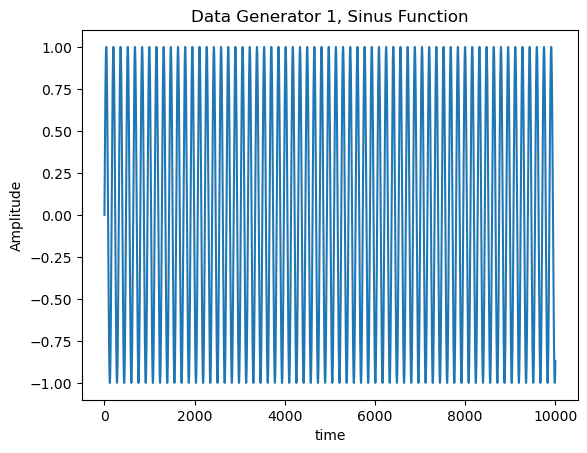

In [14]:
time = np.linspace(0, 2 * np.pi, 50000)
data = np.sin(20 * np.pi * time)

print(data.shape)
plt.plot(np.arange(data.shape[0]), data)
plt.title('Data Generator 1, Sinus Function')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

In [15]:
write_csv = False
if write_csv:
    df = pd.DataFrame(data)
    df.to_csv('gen1_sinus_data.csv', index=False)

In [16]:
if write_csv:
    df = pd.read_csv('gen1_sinus_data.csv')
    print(df)

### Data generator 2

The second data generator producer takes data from a heating measurements file. It is a time series data stream with s time stamp and many other measurements.

In [17]:
df = pd.read_csv('data/gen2_Heizungsdaten.csv')
df.head()

,Datum,HUP,ZUP,BUP,ZW2,MA1,MZ1,ZIP,VD1,VD2,...,TFB3,TEE,AI1,TMK2soll,TMK3soll,DF,SpHz,SpWq,Pth,WMstart
0,2021-08-30 23:37:55,1,0,0,0,0,1,0,0,0,...,155,155,0,0,0,0,0.4,1.0,0,0
1,2021-08-30 23:38:55,1,0,0,0,0,1,0,0,0,...,155,155,0,0,0,0,0.4,1.1,0,0
2,2021-08-30 23:39:55,1,0,0,0,0,1,0,0,0,...,155,155,0,0,0,0,0.4,1.0,0,0
3,2021-08-30 23:40:55,1,0,0,0,0,1,0,0,0,...,155,155,0,0,0,0,0.4,1.1,0,0
4,2021-08-30 23:41:55,1,0,0,0,0,1,0,0,0,...,155,155,0,0,0,0,0.4,1.0,0,0


#### Exercise 6.
The Jupiter Notebooks 'data_producer_1', 'data_producer_2', 'data_consumer1', 'data_consumer2' sending and receiving data to and from Kafka, received data is stored in a cdv-file. Run those four notebooks and check the print messages.

#### Exercise 7.

![](overview_all_scaled.jpg)

**What are the tasks of the components?**
Producer: generates the data and sends it with a topic name to a broker in Kafka.
Kafka: is a messaging system and distributes messages along its platform. Kafka runs as a cluster of one or more servers that can span multiple datacenters or cloud regions.
Broker: Kafka has storage Layers called broker. Brokers distribute the incoming messages. For bigger applications more brokers can be used to increase scalability and reliability.
Topics: Topics are named containers for messages, new messages are appended to the topic. For example, a topic can be seen as a folder in a filesystem, and the messages are the files in that folder. A topic is replicated to multiple brokers.
Partitions: A topic can be partitioned into smaller junks. Partitions are the fundamental mechanism, they enable parallelization of topics and enabling high message throughput.
Consumer: can read messages from one or more topics. Consumers are independent from the producer a can decide at which speed data is taken

**Funktionswiese?**


#### Bonus

## Part  2 - Communication Patterns